# 알고리즘 수업 - 깊이 우선 탐색 1
타 블로그를 참조했는가 : O

reference :
    https://velog.io/@ledcost/%EB%B0%B1%EC%A4%80-24479-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%88%98%EC%97%85-%EA%B9%8A%EC%9D%B4-%EC%9A%B0%EC%84%A0-%ED%83%90%EC%83%89-1-%EC%8B%A4%EB%B2%84-2-DFS
    https://gmlwjd9405.github.io/2018/08/14/algorithm-dfs.html

### Q)
오늘도 서준이는 깊이 우선 탐색(DFS) 수업 조교를 하고 있다. 아빠가 수업한 내용을 학생들이 잘 이해했는지 문제를 통해서 확인해보자.

N개의 정점과 M개의 간선으로 구성된 무방향 그래프(undirected graph)가 주어진다. 정점 번호는 1번부터 N번이고 모든 간선의 가중치는 1이다. 정점 R에서 시작하여 깊이 우선 탐색으로 노드를 방문할 경우 노드의 방문 순서를 출력하자.

깊이 우선 탐색 의사 코드는 다음과 같다. 인접 정점은 오름차순으로 방문한다.

In [ ]:
dfs(V, E, R) {  # V : 정점 집합, E : 간선 집합, R : 시작 정점
    visited[R] <- YES;  # 시작 정점 R을 방문 했다고 표시한다.
    for each x ∈ E(R)  # E(R) : 정점 R의 인접 정점 집합.(정점 번호를 오름차순으로 방문한다)
        if (visited[x] = NO) then dfs(V, E, x);
}

### Input)
첫째 줄에 정점의 수 N (5 ≤ N ≤ 100,000), 간선의 수 M (1 ≤ M ≤ 200,000), 시작 정점 R (1 ≤ R ≤ N)이 주어진다.

다음 M개 줄에 간선 정보 u v가 주어지며 정점 u와 정점 v의 가중치 1인 양방향 간선을 나타낸다. (1 ≤ u < v ≤ N, u ≠ v) 모든 간선의 (u, v) 쌍의 값은 서로 다르다.

### Output)
첫째 줄부터 N개의 줄에 정수를 한 개씩 출력한다. i번째 줄에는 정점 i의 방문 순서를 출력한다. 시작 정점의 방문 순서는 1이다. 시작 정점에서 방문할 수 없는 경우 0을 출력한다.

### Source Code)

In [ ]:
import sys
from sys import stdin
input = stdin.readline
sys.setrecursionlimit(10**9)

N, M, R = map(int, input().split())
graph = [[] for _ in range(N+1)]
path = []
visit_rank = [0] * (N+1)
visited = [False] * (N+1)

for _ in range(M):
    a, b = map(int, input().split())
    graph[a].append(b)
    graph[b].append(a)

for i in range(1, N+1):
    graph[i].sort()

def DFS(start):
    visited[start] = True
    path.append(start)

    for adj_node in graph[start]:
        if visited[adj_node] == False:
            DFS(adj_node)

DFS(R)

for idx, node in zip(range(1, len(path)+1), path):
    visit_rank[node] = idx

print(*visit_rank[1:], sep="\n")

DFS의 개념을 먼저 짚고가자

DFS란 루트 노드에서 시작해서 다음 분기(branch)로 넘어가기 전에 해당 분기를 완벽하게 탐색하는 방법이다.

- 미로를 탐색할 때 한 방향으로 갈 수 있을 때까지 계속 가다가 더 이상 갈 수 없게 되면 다시 가장 가까운 갈림길로 돌아와서 이곳으로부터 다른 방향으로 다시 탐색을 진행하는 방법과 유사하다.
- 즉, 넓게 깊게 탐색하는 것이다
- 모든 노드를 방문하고자 할 때 사용한다.
- BFS 보다 좀 더 간단하다
- 속도는 BFS보다 느리다

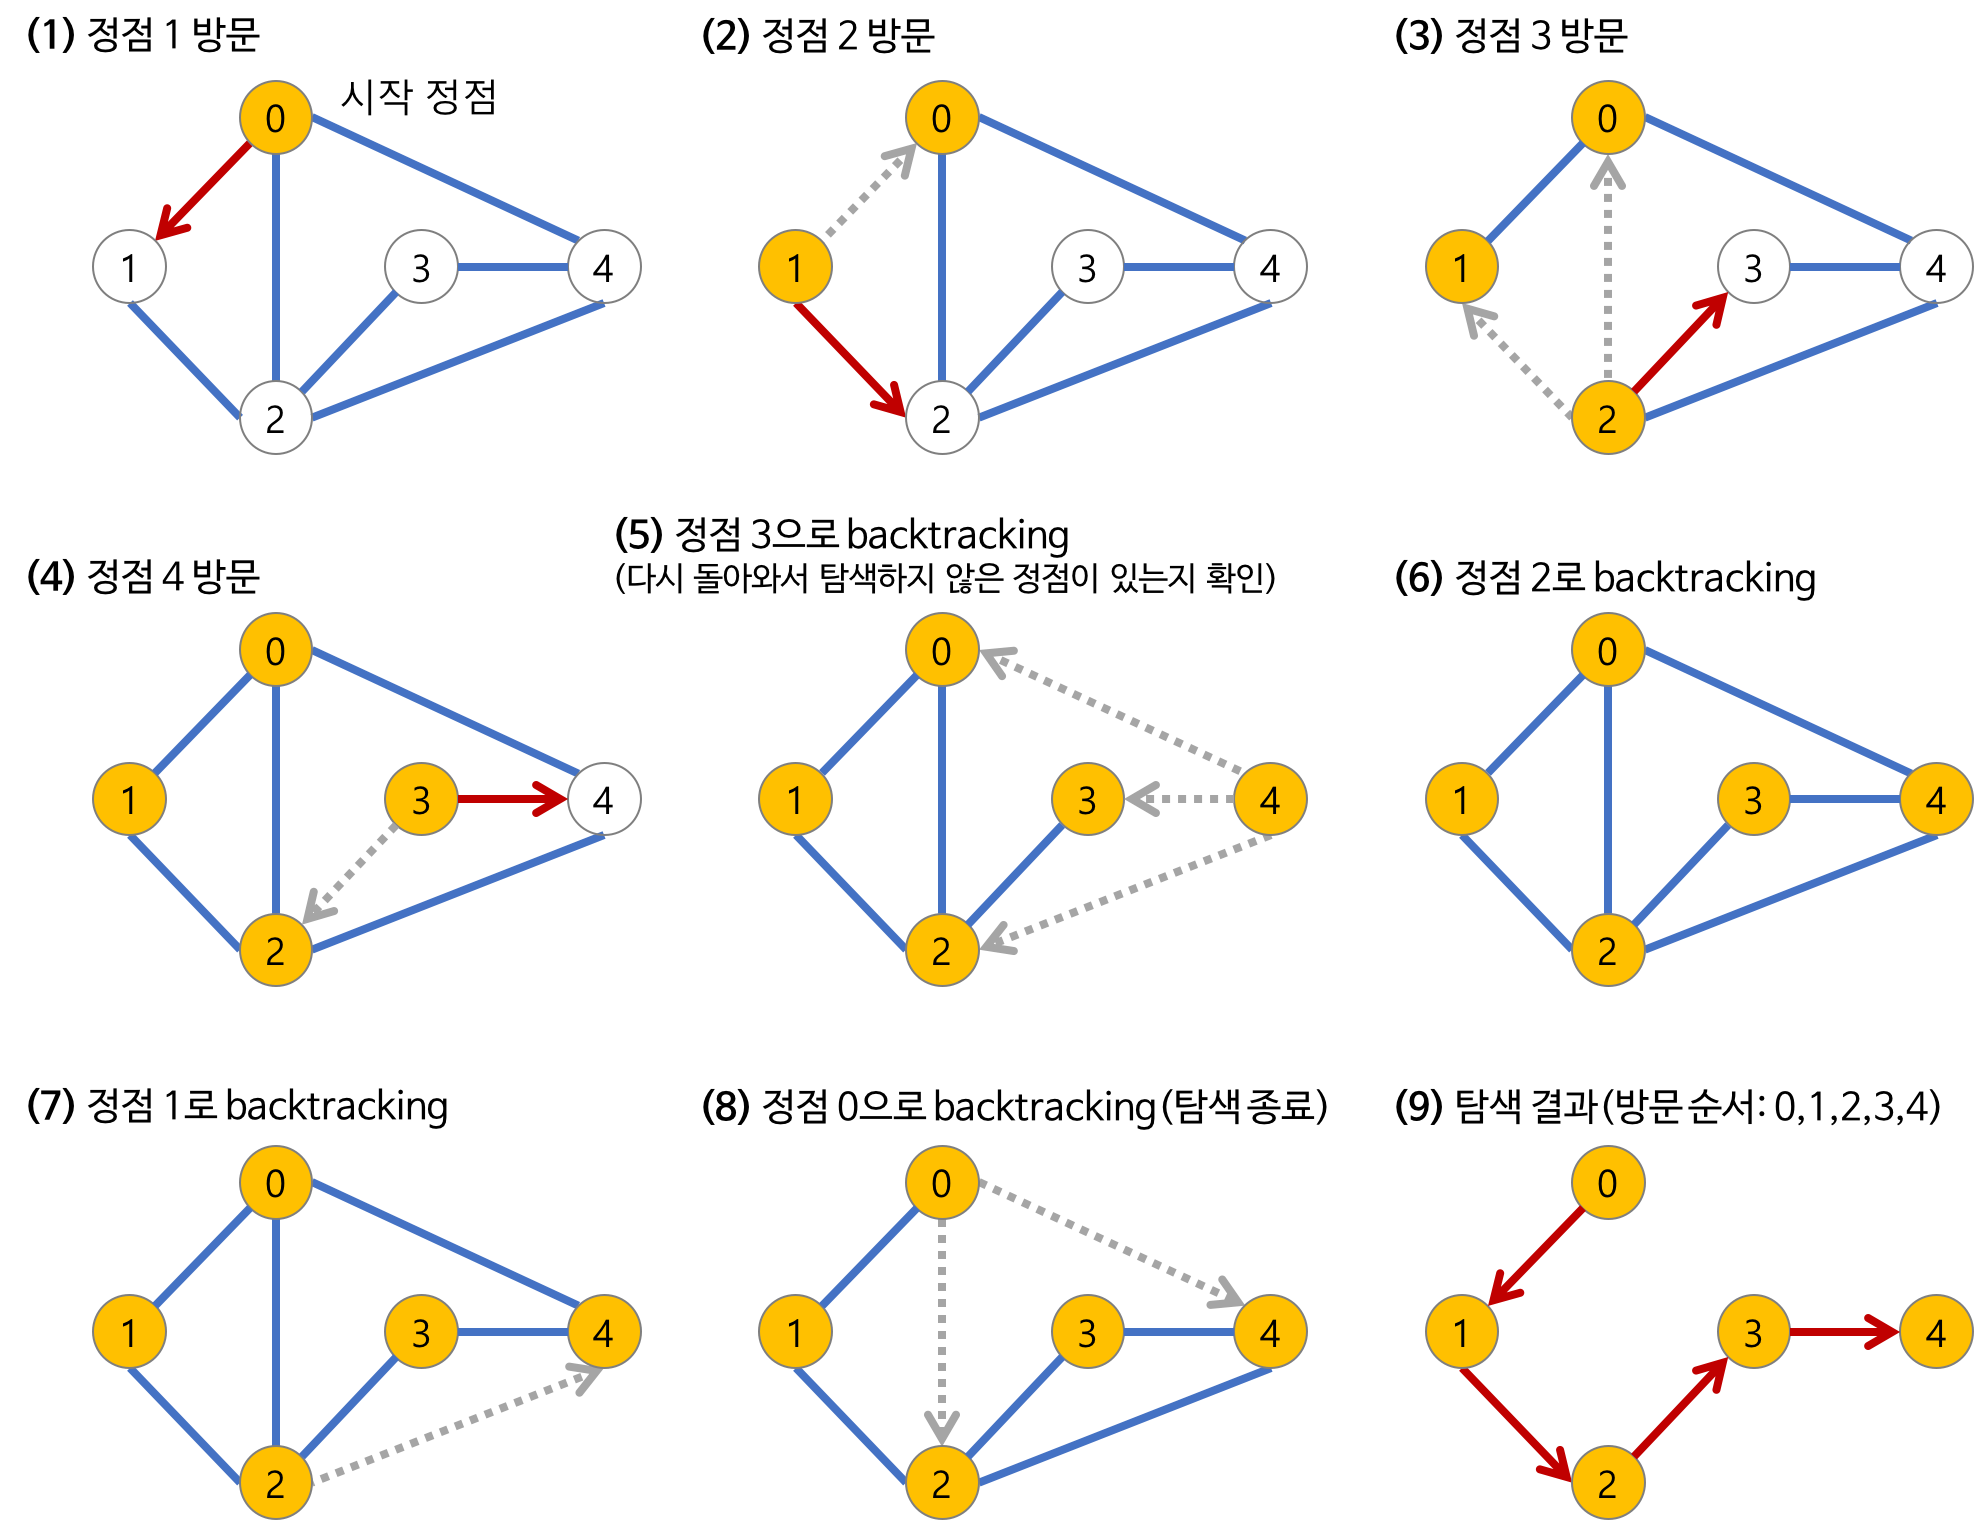

pypy3 로 했을 땐 메모리초과가 발생했지만 python3 로 실행했을 땐 잘 작동했다.